In [1]:
'''
Statistical and Machine Learning Methods in Particle and Astrophysics
TUM - summer term 2019
M. Agostini <matteo.agostini@tum.de> and Hans Niederhausen@tum.de <hans.niederhausen@tum.de>

snippet: "concept of coverage using the normal mean as example"

Here we demonstrate the concept of coverage (see lecture) of a confidence interval using the example
of estimating the mean of a normal distribution.

We assume that the variance is a known constant (not an unknown parameter).
Thus, the normal mean is the only parameter in this problem.

To construct the confidence interval we use the pivotal quantity (\bar{x}-mu)/(sigma/sqrt(N)).
(in this problem this is equivalent to the corresponding likelihood ratio hypothesis test)
'''



'\nStatistical and Machine Learning Methods in Particle and Astrophysics\nTUM - summer term 2019\nM. Agostini <matteo.agostini@tum.de> and Hans Niederhausen@tum.de <hans.niederhausen@tum.de>\n\nsnippet: "concept of coverage using the normal mean as example"\n\nHere we demonstrate the concept of coverage (see lecture) of a confidence interval using the example\nof estimating the mean of a normal distribution.\n\nWe assume that the variance is a known constant (not an unknown parameter).\nThus, the normal mean is the only parameter in this problem.\n\nTo construct the confidence interval we use the pivotal quantity (\x08ar{x}-mu)/(sigma/sqrt(N)).\n(in this problem this is equivalent to the corresponding likelihood ratio hypothesis test)\n'

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('ggplot')


def normal_TS(X, tmu, tsigma=1., n=10):
    '''
    The LRT for H0: mu = mu0 and H1: mu != mu0 can be shown to be equivalent
    to using the following TS: lambda=|\bar{X} - mu0| / (sigma / sqrt(n))
    which is distributed as a standard normal, i.e. N(0, 1)
    ''' 
    tmean = np.average(X)
    return np.abs(tmean-tmu) / (tsigma / np.sqrt(n))

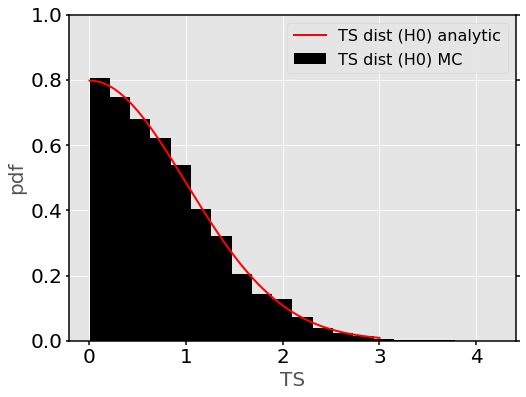

In [3]:
# let's generate some data
tn = 5 # sample size
mu0 = 10.0
sigma = 2.0

tss=[]
for i in range(10000):
    tx = np.random.normal(mu0, sigma, tn)
    ts = normal_TS(tx, mu0, tsigma=sigma, n=tn)
    tss.append(ts)

xvals = np.linspace(0,3,1000)
yvals = norm.pdf(xvals, 0, 1)*2

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
plt.hist(tss, density=True, color='k', bins=20, label="TS dist (H0) MC")
plt.plot(xvals,yvals, 'r-', linewidth=2, label="TS dist (H0) analytic")
plt.ylim([0, 1.0])
ax.set_xlabel('TS', fontsize=20)
ax.set_ylabel('pdf', fontsize=20)
for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(1.5)
          ax.spines[axis].set_color('0.0')
    
ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=20)
ax.yaxis.set_ticks_position('both')
plt.legend(fontsize=16)

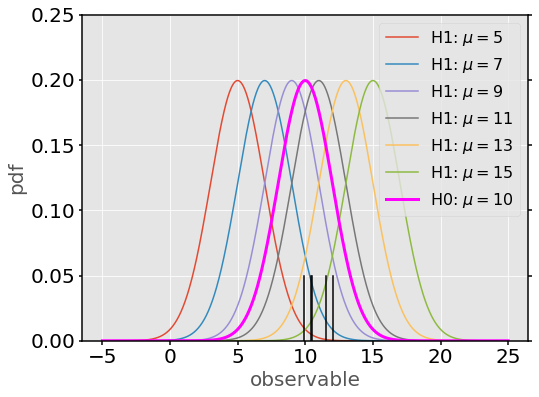

In [4]:
# let's generate some data

X = np.random.normal(mu0, sigma, tn)

some_mus = np.linspace(5, 15, 6)
xvals = np.linspace(-5,25,1000)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
for mu in some_mus:
    plt.plot(xvals, norm.pdf(xvals, mu, sigma), label="H1: $\mu=%2.f$" %(mu))
    
plt.plot(xvals, norm.pdf(xvals, mu0, sigma), linewidth=3.0, color='magenta', label="H0: $\mu=10$")
for x in X:
    plt.axvline(x=x, color='k', ymin=0, ymax=0.2)
    
plt.ylim([0, 0.25])
ax.set_xlabel('observable', fontsize=20)
ax.set_ylabel('pdf', fontsize=20)
for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(1.5)
          ax.spines[axis].set_color('0.0')
    
ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=20)
ax.yaxis.set_ticks_position('both')
plt.legend(fontsize=16)

0.053293688842534666


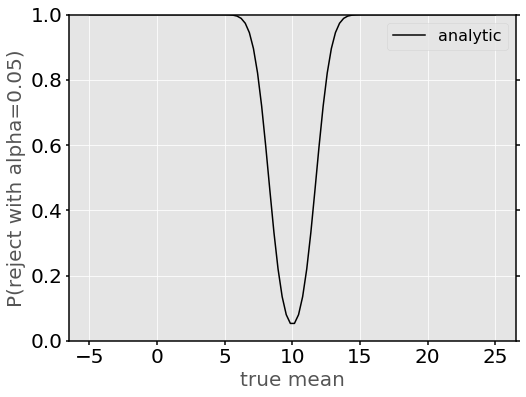

In [5]:
# lets study the power function of the test
# i.e. the probability for the test to reject the null hypothesis mu=mu0 as function of the true parameter mu=mu1.
# (for mu=mu1=mu0 the power is identical to the Type I error probability -> alpha)

# lets decide on a discovery threshold corresponding to alpha = 0.05
# to get the corresponding critical value c0 for the TS we need P(TS > c0) <= alpha.
alpha = 1-0.95

# this test is two tailed.
c0 = norm.ppf(1-alpha/2.)

# the power is the probability for the TS (see above)
# to exceed the critical value as a function of the possible values of the parameter
# for the normal problem, this is analytic

possible_mus = np.linspace(-5,25,100)

# after some algebra ...
powers = [norm.cdf(-c0+(mu0-mu)/(sigma/np.sqrt(tn)),0,1)+(1.-norm.cdf(c0+(mu0-mu)/(sigma/np.sqrt(tn)),0,1)) for mu in possible_mus]
print np.amin(powers) # 0.05 as expected!

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
plt.plot(possible_mus, powers, "k-", label='analytic')
plt.ylim([0, 1.0])
ax.set_xlabel('true mean', fontsize=20)
ax.set_ylabel('P(reject with alpha=0.05)', fontsize=20)
for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(1.5)
          ax.spines[axis].set_color('0.0')
    
ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=20)
ax.yaxis.set_ticks_position('both')
plt.legend(fontsize=16)


H1: mu = -5.0


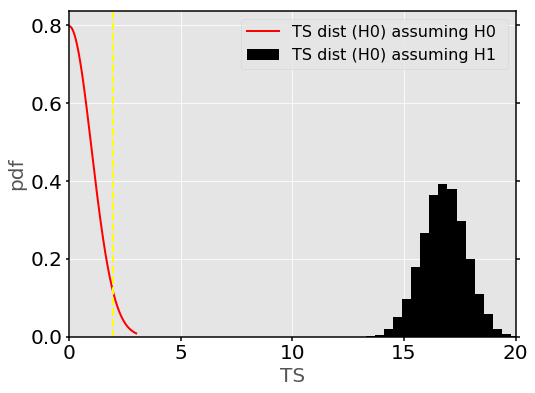

H1: mu = -4.696969696969697


<Figure size 432x288 with 0 Axes>

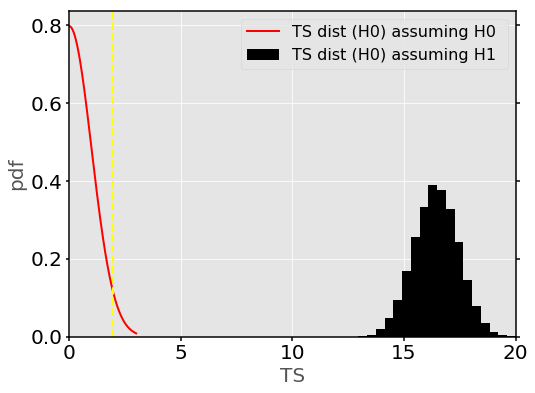

H1: mu = -4.393939393939394


<Figure size 432x288 with 0 Axes>

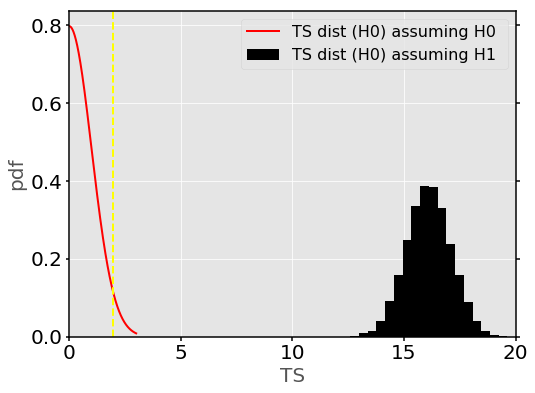

H1: mu = -4.090909090909091


<Figure size 432x288 with 0 Axes>

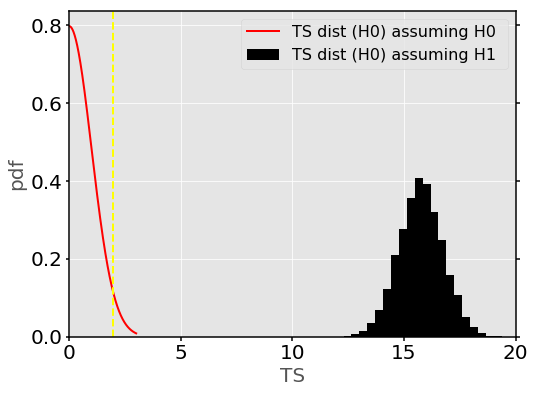

H1: mu = -3.787878787878788


<Figure size 432x288 with 0 Axes>

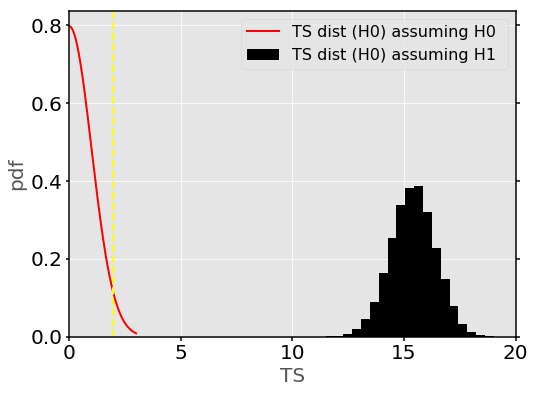

H1: mu = -3.484848484848485


<Figure size 432x288 with 0 Axes>

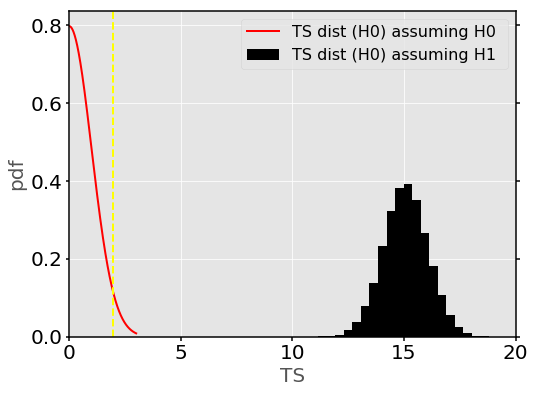

H1: mu = -3.1818181818181817


<Figure size 432x288 with 0 Axes>

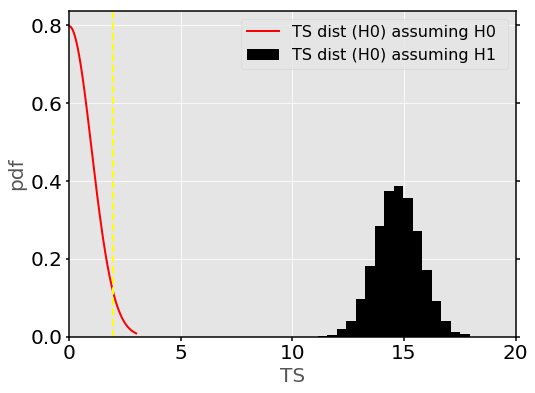

H1: mu = -2.878787878787879


<Figure size 432x288 with 0 Axes>

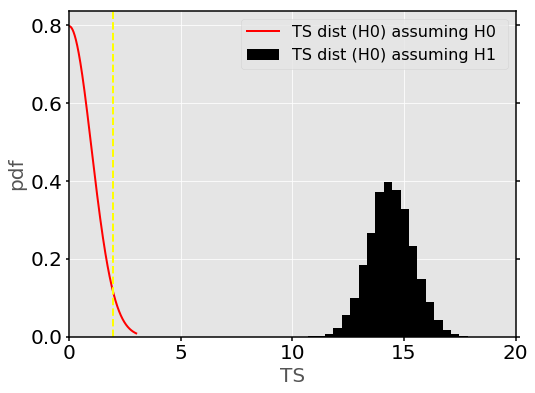

H1: mu = -2.5757575757575757


<Figure size 432x288 with 0 Axes>

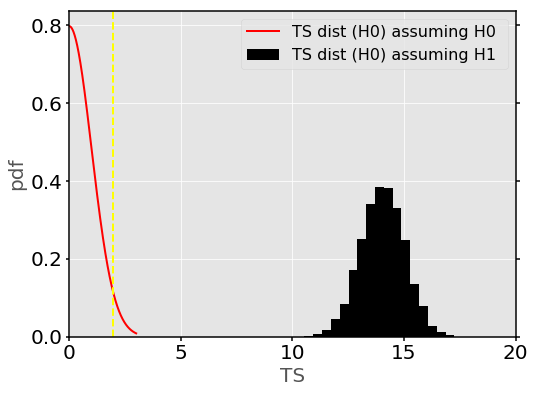

H1: mu = -2.2727272727272725


<Figure size 432x288 with 0 Axes>

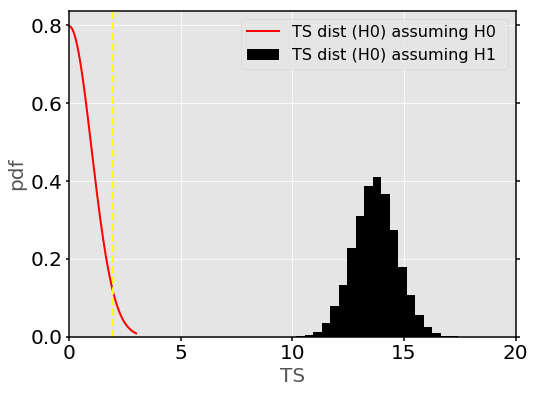

H1: mu = -1.9696969696969697


<Figure size 432x288 with 0 Axes>

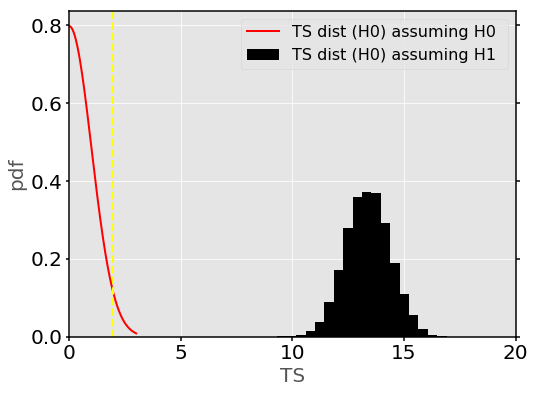

H1: mu = -1.6666666666666665


<Figure size 432x288 with 0 Axes>

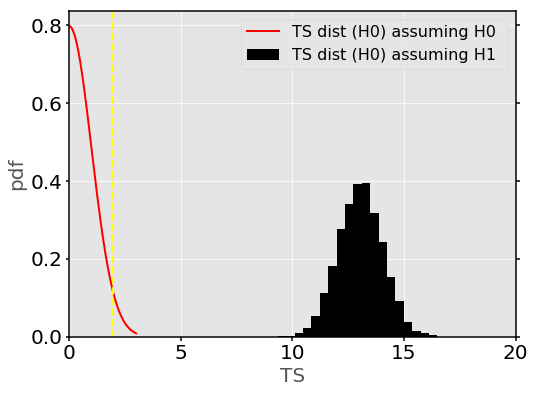

H1: mu = -1.3636363636363633


<Figure size 432x288 with 0 Axes>

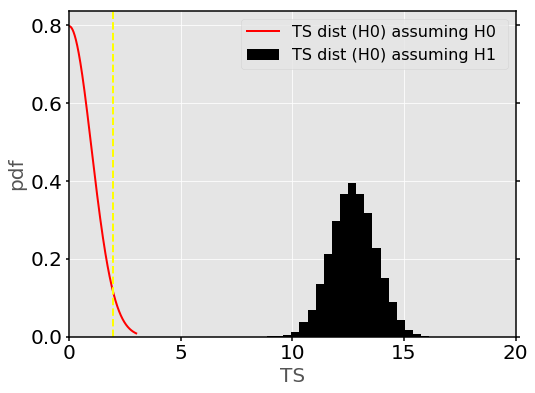

H1: mu = -1.0606060606060606


<Figure size 432x288 with 0 Axes>

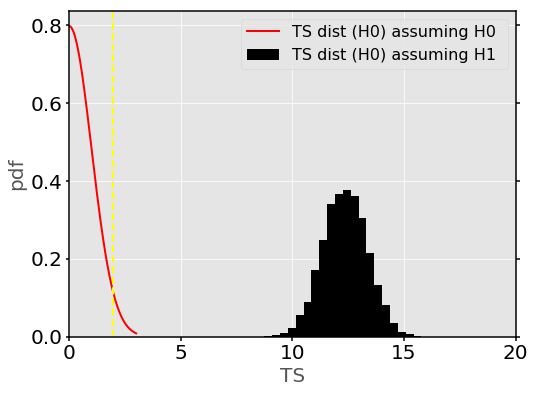

H1: mu = -0.7575757575757578


<Figure size 432x288 with 0 Axes>

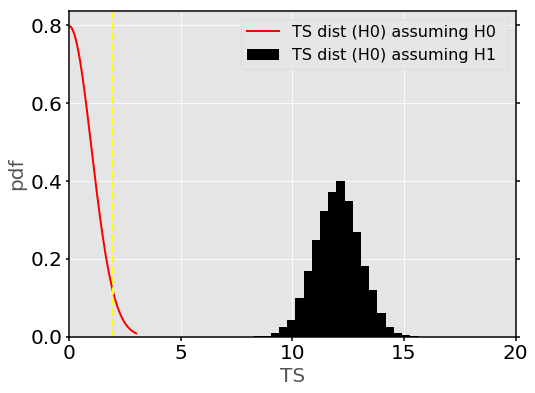

H1: mu = -0.45454545454545414


<Figure size 432x288 with 0 Axes>

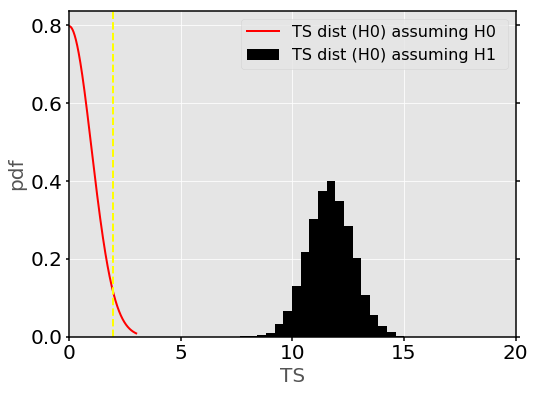

H1: mu = -0.15151515151515138


<Figure size 432x288 with 0 Axes>

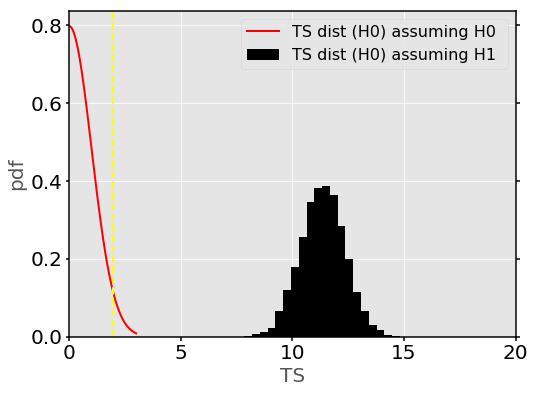

H1: mu = 0.15151515151515138


<Figure size 432x288 with 0 Axes>

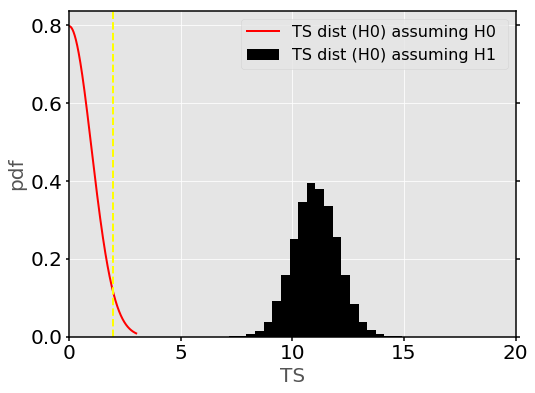

H1: mu = 0.45454545454545503


<Figure size 432x288 with 0 Axes>

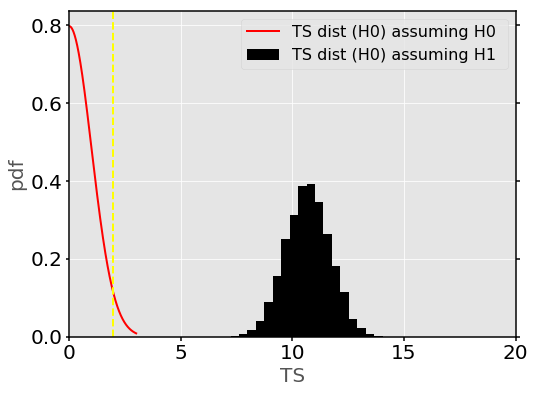

H1: mu = 0.7575757575757578


<Figure size 432x288 with 0 Axes>

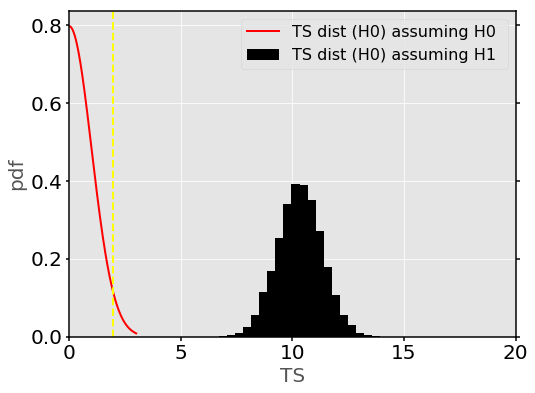

H1: mu = 1.0606060606060606


<Figure size 432x288 with 0 Axes>

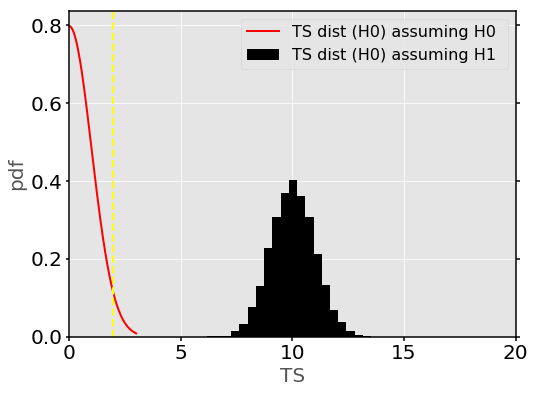

H1: mu = 1.3636363636363642


<Figure size 432x288 with 0 Axes>

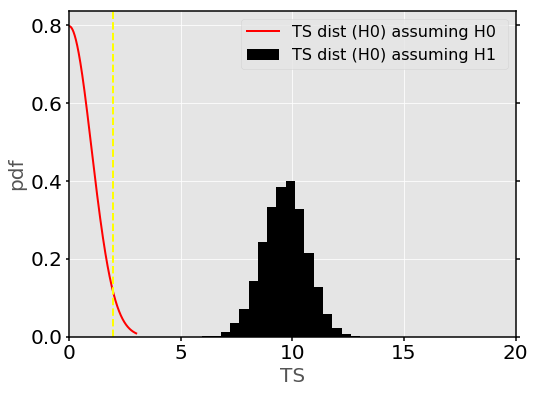

H1: mu = 1.666666666666667


<Figure size 432x288 with 0 Axes>

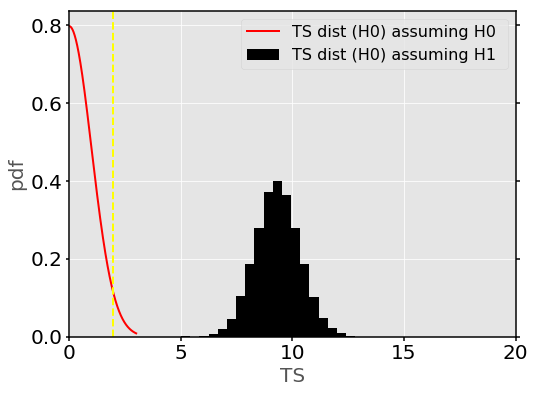

H1: mu = 1.9696969696969697


<Figure size 432x288 with 0 Axes>

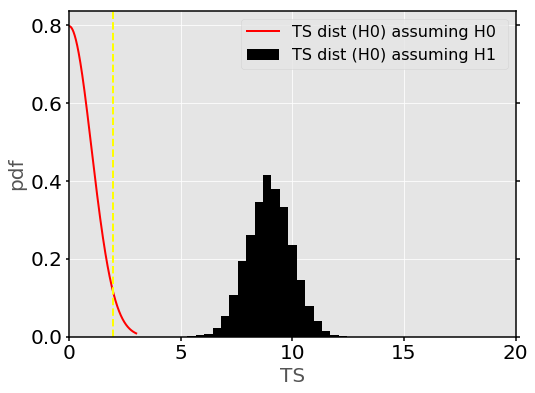

H1: mu = 2.2727272727272734


<Figure size 432x288 with 0 Axes>

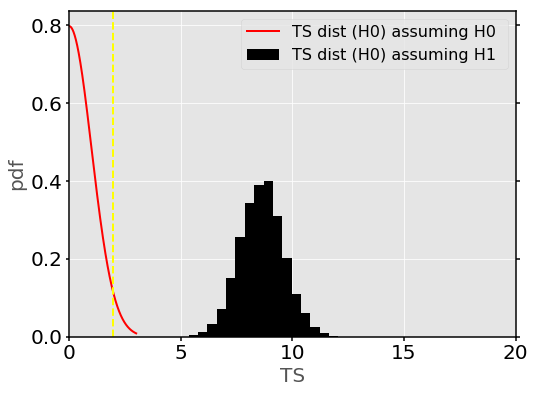

H1: mu = 2.575757575757576


<Figure size 432x288 with 0 Axes>

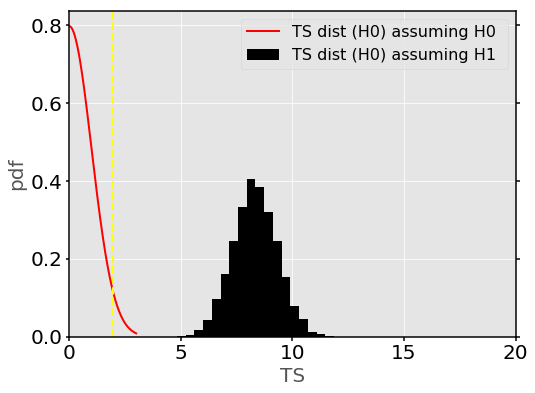

H1: mu = 2.878787878787879


<Figure size 432x288 with 0 Axes>

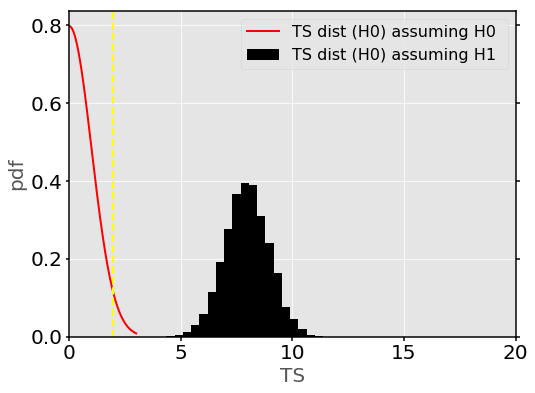

H1: mu = 3.1818181818181817


<Figure size 432x288 with 0 Axes>

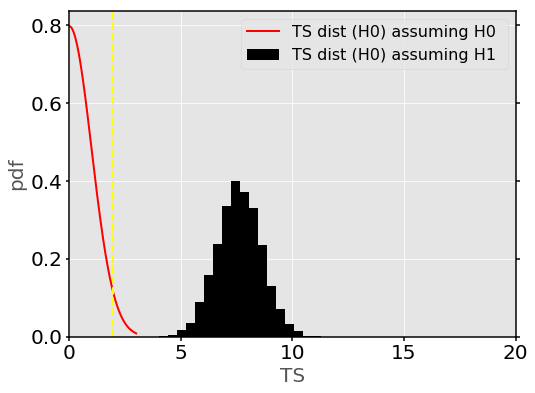

H1: mu = 3.4848484848484844


<Figure size 432x288 with 0 Axes>

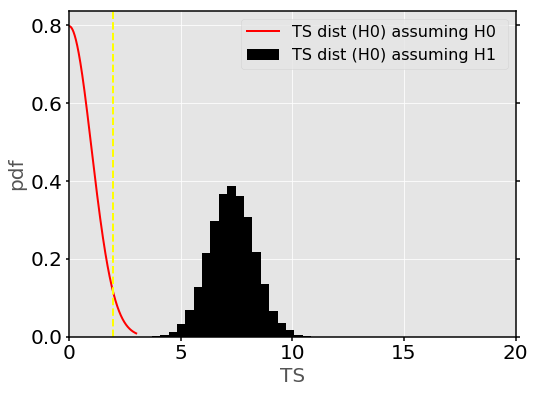

H1: mu = 3.787878787878789


<Figure size 432x288 with 0 Axes>

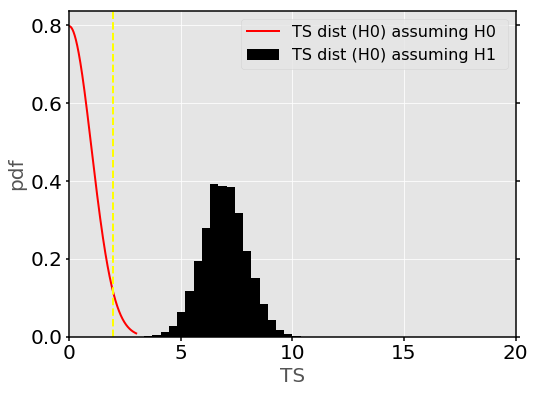

H1: mu = 4.090909090909092


<Figure size 432x288 with 0 Axes>

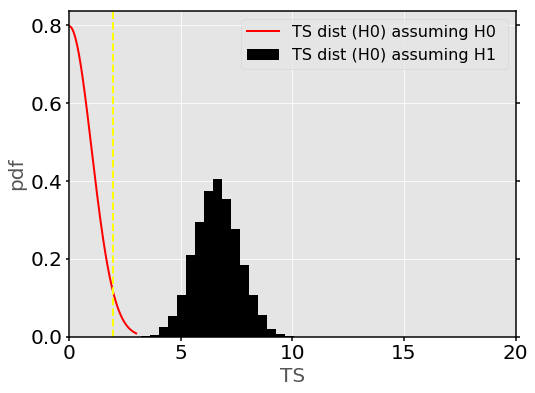

H1: mu = 4.3939393939393945


<Figure size 432x288 with 0 Axes>

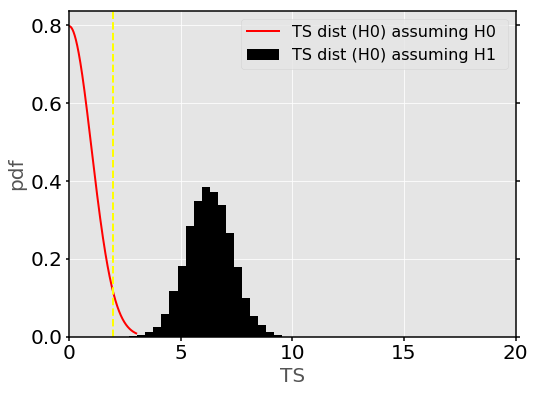

H1: mu = 4.696969696969697


<Figure size 432x288 with 0 Axes>

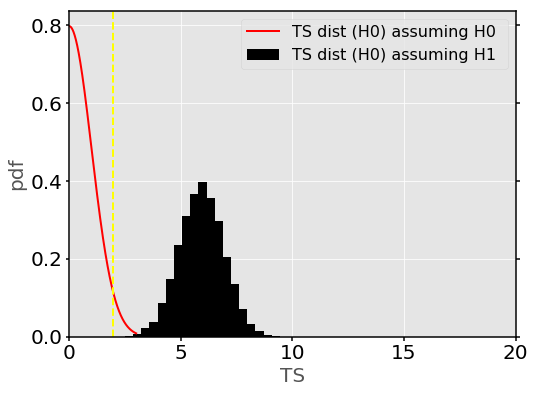

H1: mu = 5.0


<Figure size 432x288 with 0 Axes>

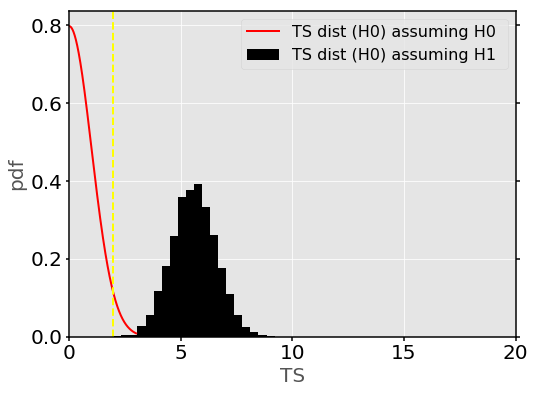

H1: mu = 5.303030303030303


<Figure size 432x288 with 0 Axes>

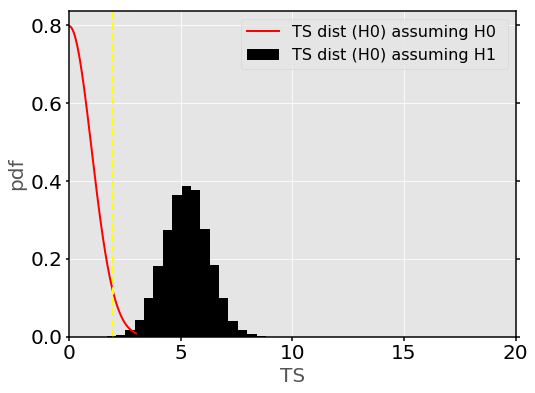

H1: mu = 5.6060606060606055


<Figure size 432x288 with 0 Axes>

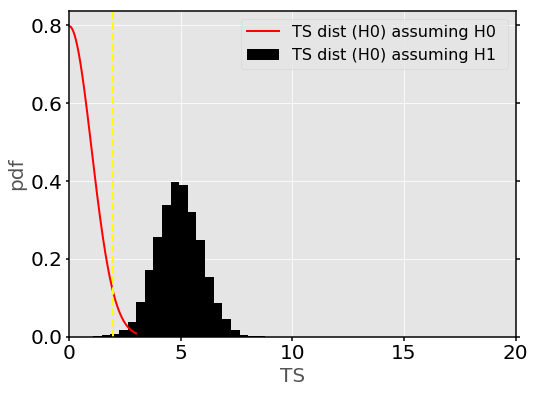

H1: mu = 5.90909090909091


<Figure size 432x288 with 0 Axes>

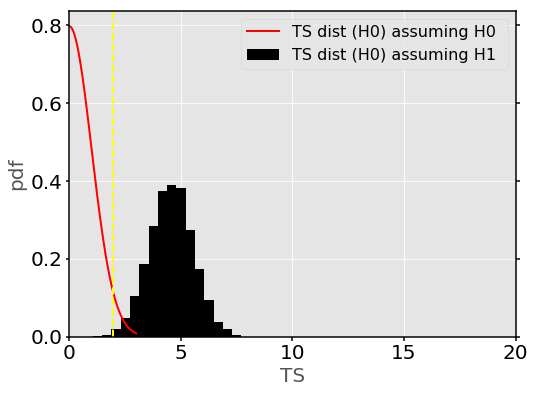

H1: mu = 6.212121212121213


<Figure size 432x288 with 0 Axes>

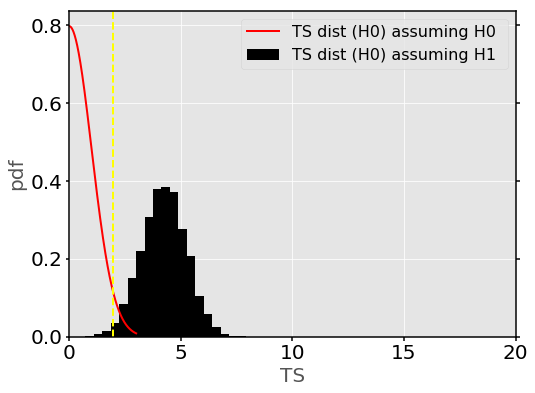

H1: mu = 6.515151515151516


<Figure size 432x288 with 0 Axes>

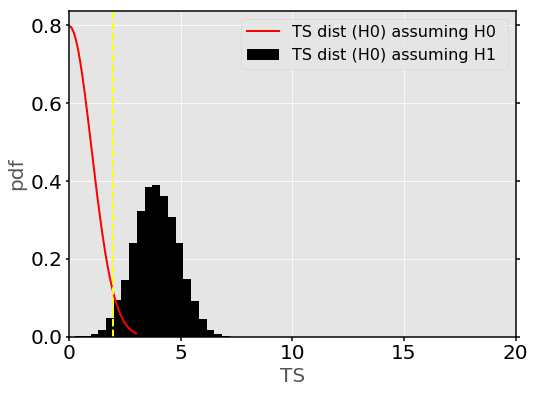

H1: mu = 6.818181818181818


<Figure size 432x288 with 0 Axes>

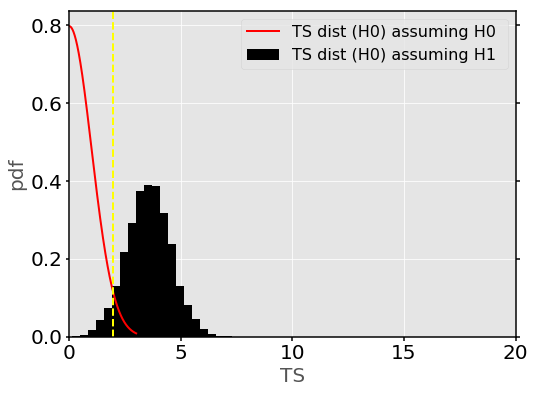

H1: mu = 7.121212121212121


<Figure size 432x288 with 0 Axes>

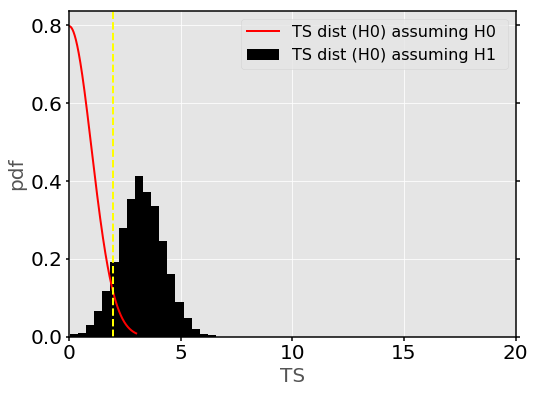

H1: mu = 7.424242424242424


<Figure size 432x288 with 0 Axes>

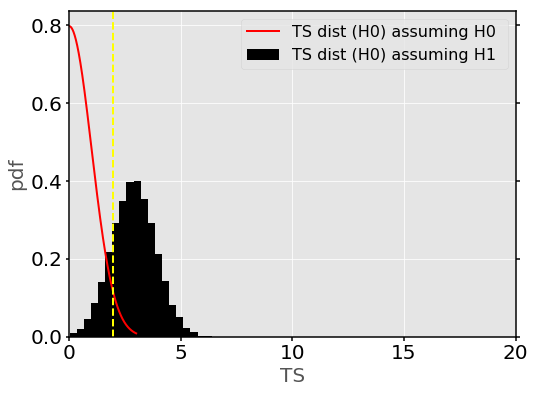

H1: mu = 7.727272727272728


<Figure size 432x288 with 0 Axes>

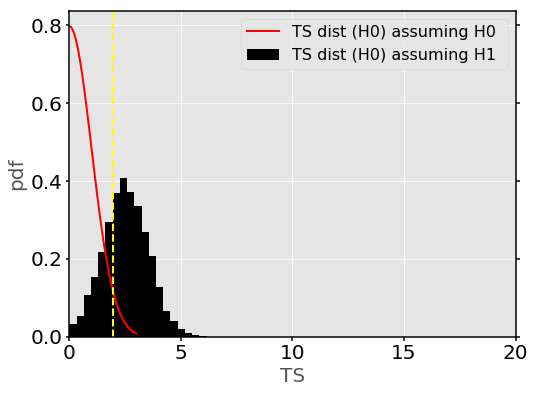

H1: mu = 8.030303030303031


<Figure size 432x288 with 0 Axes>

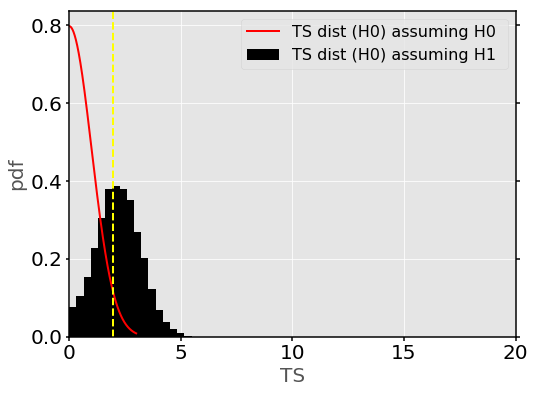

H1: mu = 8.333333333333334


<Figure size 432x288 with 0 Axes>

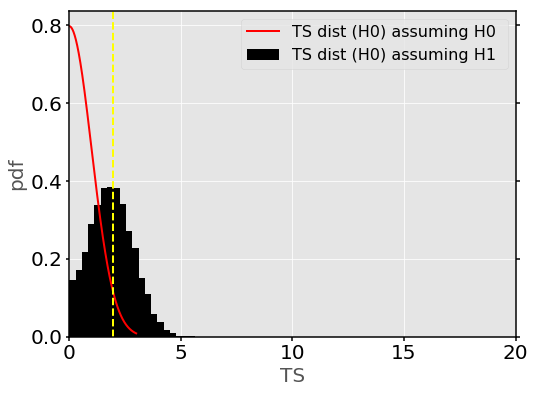

H1: mu = 8.636363636363637


<Figure size 432x288 with 0 Axes>

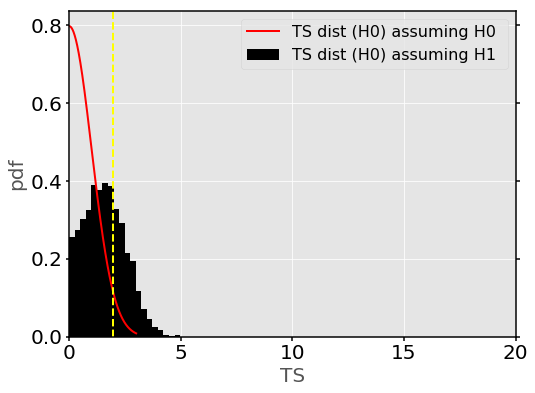

H1: mu = 8.93939393939394


<Figure size 432x288 with 0 Axes>

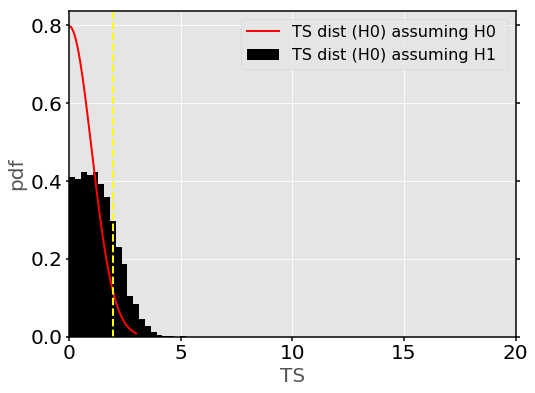

H1: mu = 9.242424242424242


<Figure size 432x288 with 0 Axes>

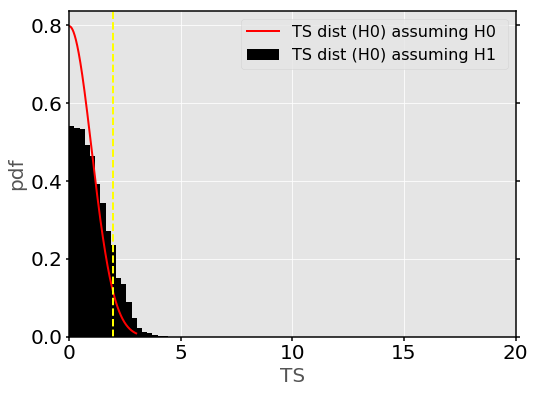

H1: mu = 9.545454545454547


<Figure size 432x288 with 0 Axes>

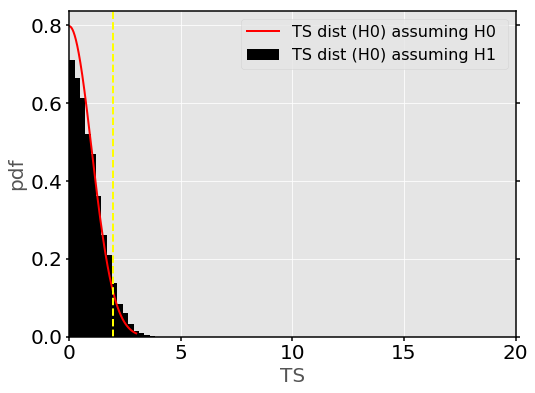

H1: mu = 9.84848484848485


<Figure size 432x288 with 0 Axes>

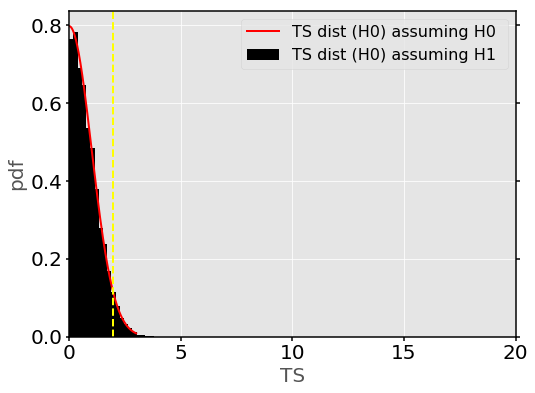

H1: mu = 10.151515151515152


<Figure size 432x288 with 0 Axes>

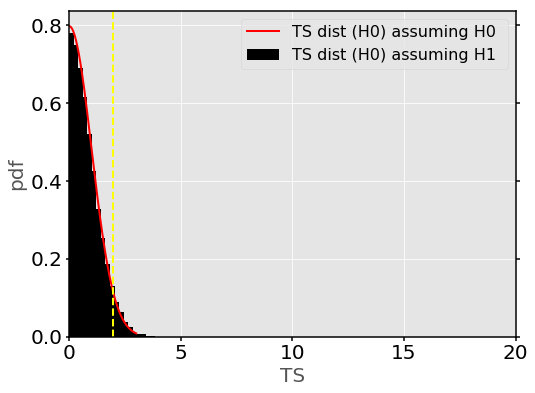

H1: mu = 10.454545454545455


<Figure size 432x288 with 0 Axes>

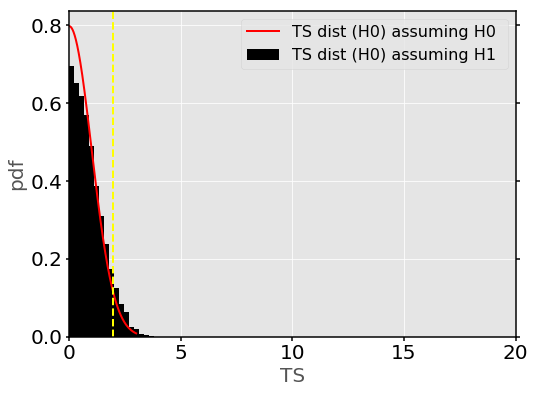

H1: mu = 10.757575757575758


<Figure size 432x288 with 0 Axes>

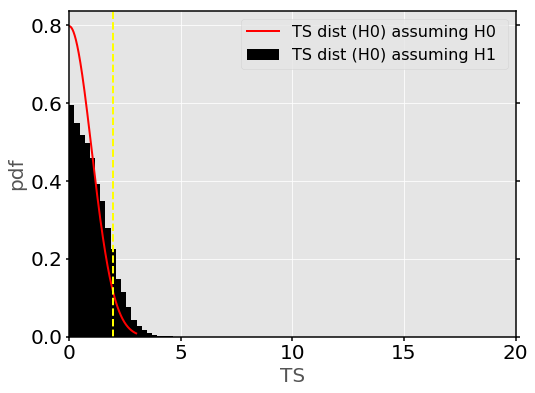

H1: mu = 11.060606060606062


<Figure size 432x288 with 0 Axes>

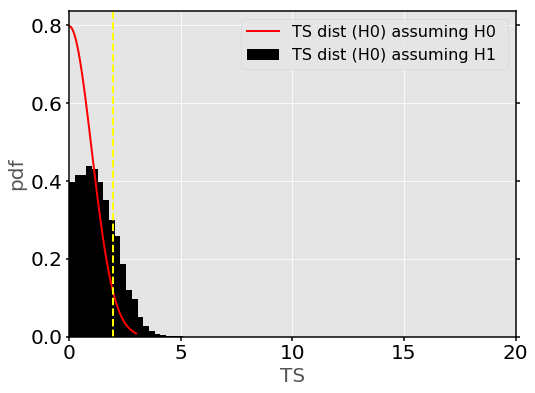

H1: mu = 11.363636363636363


<Figure size 432x288 with 0 Axes>

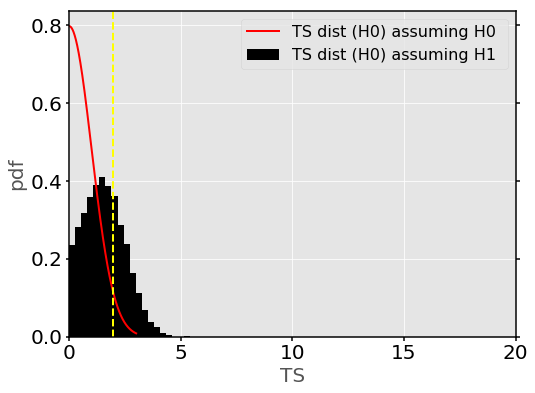

H1: mu = 11.666666666666668


<Figure size 432x288 with 0 Axes>

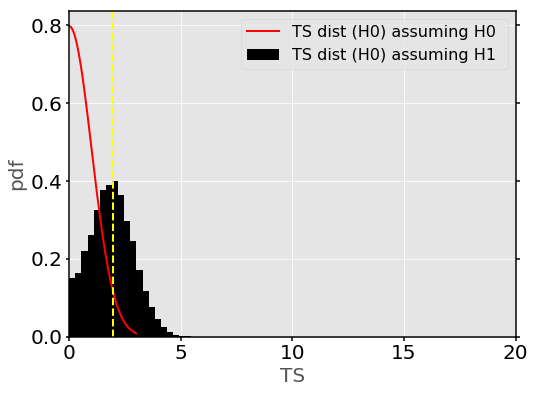

H1: mu = 11.969696969696969


<Figure size 432x288 with 0 Axes>

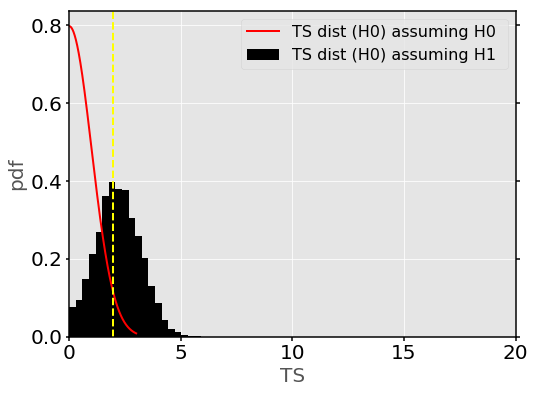

H1: mu = 12.272727272727273


<Figure size 432x288 with 0 Axes>

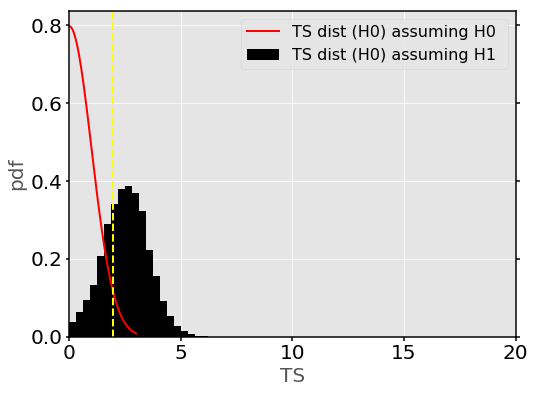

H1: mu = 12.575757575757578


<Figure size 432x288 with 0 Axes>

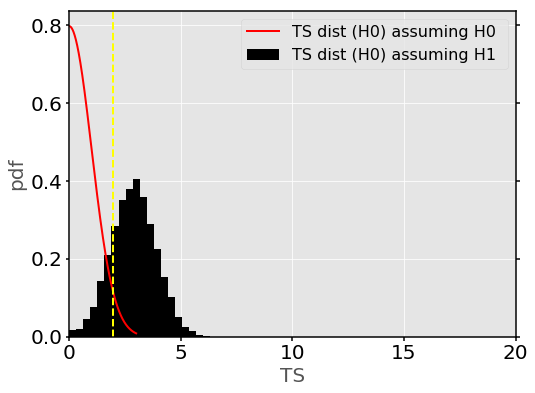

H1: mu = 12.878787878787879


<Figure size 432x288 with 0 Axes>

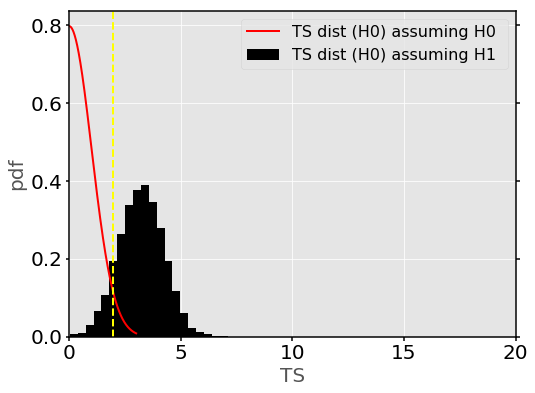

H1: mu = 13.181818181818183


<Figure size 432x288 with 0 Axes>

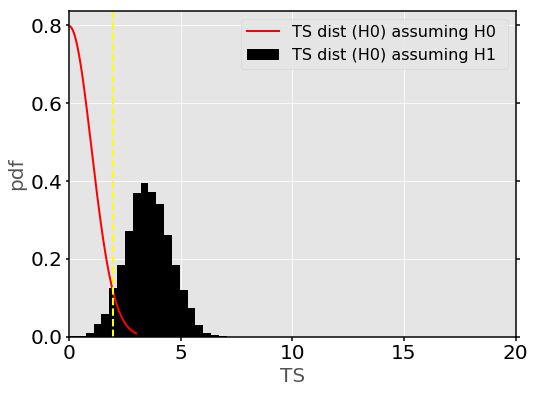

H1: mu = 13.484848484848484


<Figure size 432x288 with 0 Axes>

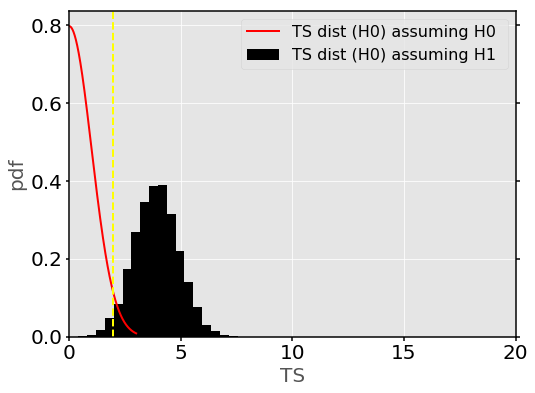

H1: mu = 13.787878787878789


<Figure size 432x288 with 0 Axes>

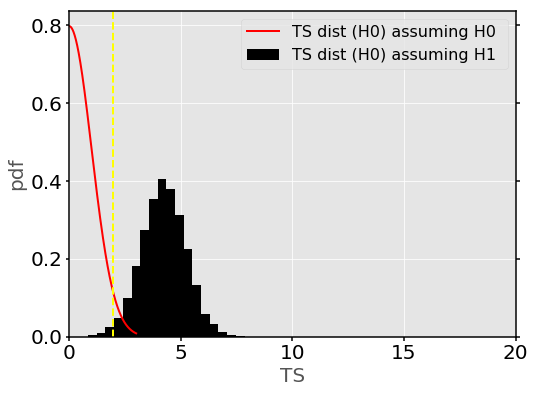

H1: mu = 14.09090909090909


<Figure size 432x288 with 0 Axes>

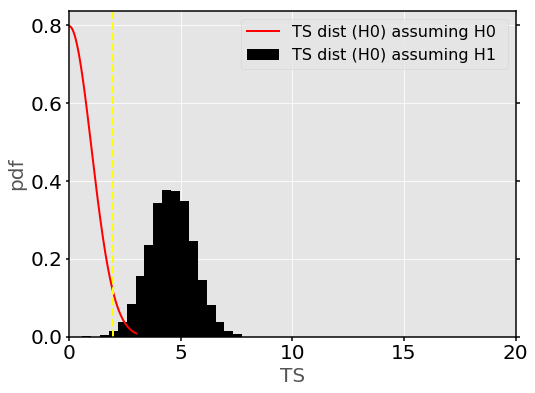

H1: mu = 14.393939393939394


<Figure size 432x288 with 0 Axes>

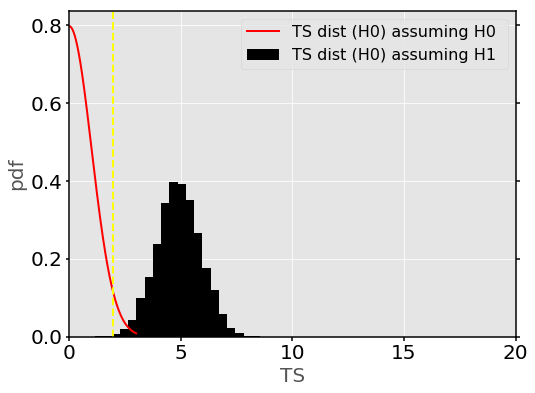

H1: mu = 14.696969696969699


<Figure size 432x288 with 0 Axes>

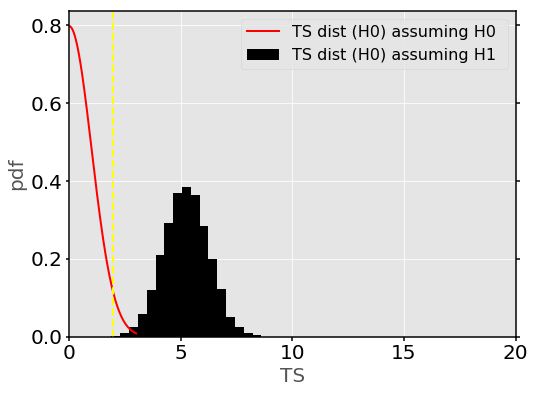

H1: mu = 15.0


<Figure size 432x288 with 0 Axes>

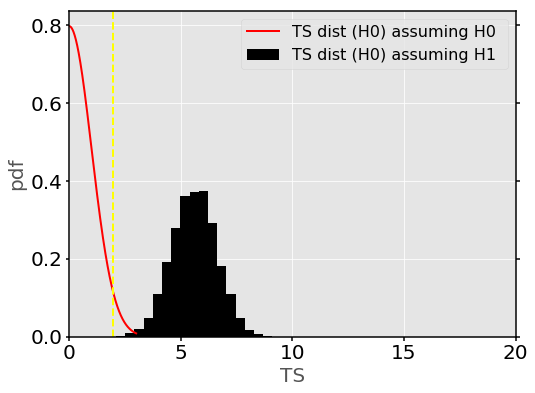

H1: mu = 15.303030303030305


<Figure size 432x288 with 0 Axes>

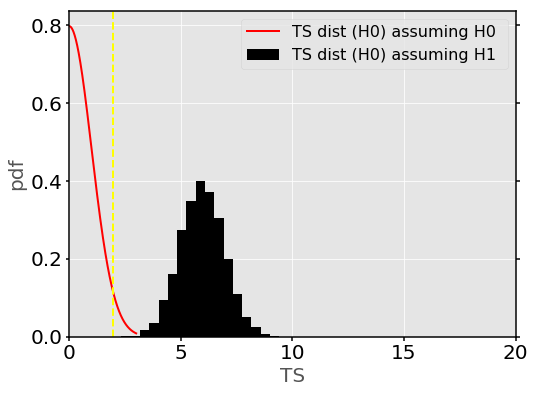

H1: mu = 15.606060606060606


<Figure size 432x288 with 0 Axes>

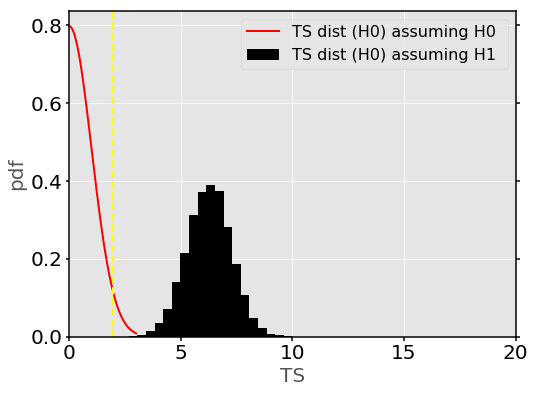

H1: mu = 15.90909090909091


<Figure size 432x288 with 0 Axes>

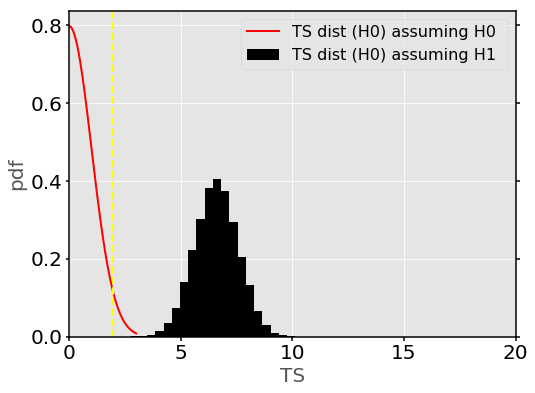

H1: mu = 16.21212121212121


<Figure size 432x288 with 0 Axes>

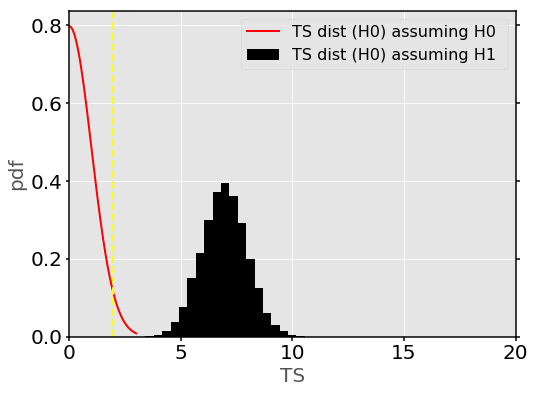

H1: mu = 16.515151515151516


<Figure size 432x288 with 0 Axes>

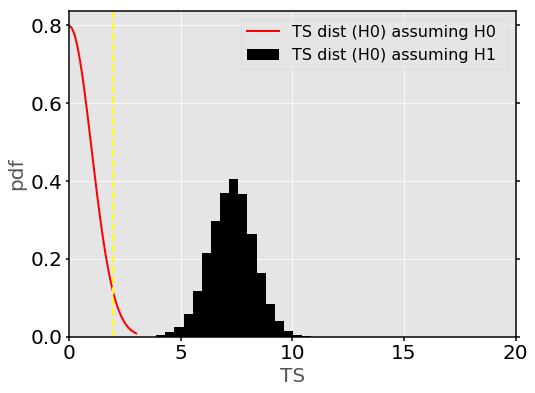

H1: mu = 16.81818181818182


<Figure size 432x288 with 0 Axes>

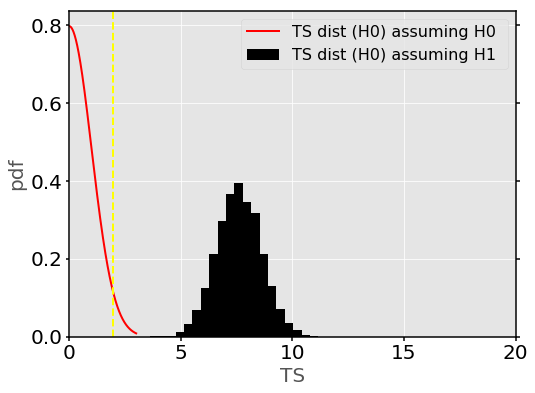

H1: mu = 17.12121212121212


<Figure size 432x288 with 0 Axes>

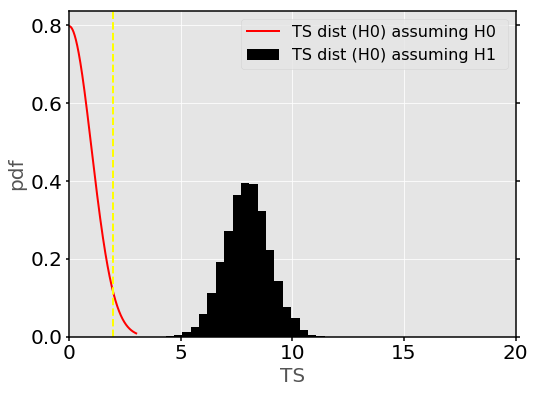

H1: mu = 17.424242424242426


<Figure size 432x288 with 0 Axes>

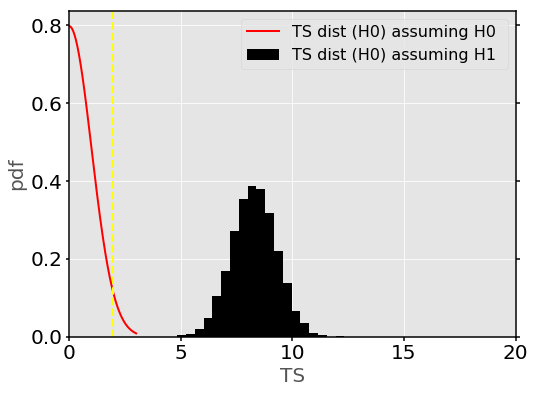

H1: mu = 17.727272727272727


<Figure size 432x288 with 0 Axes>

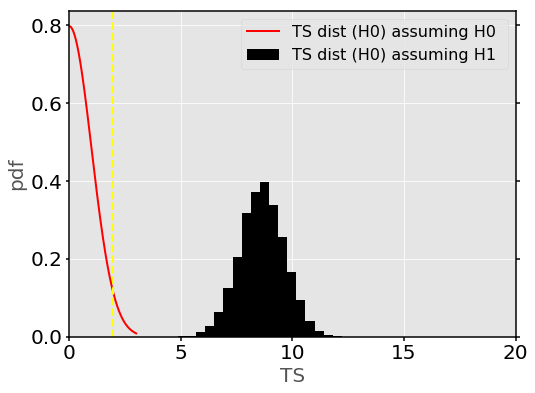

H1: mu = 18.03030303030303


<Figure size 432x288 with 0 Axes>

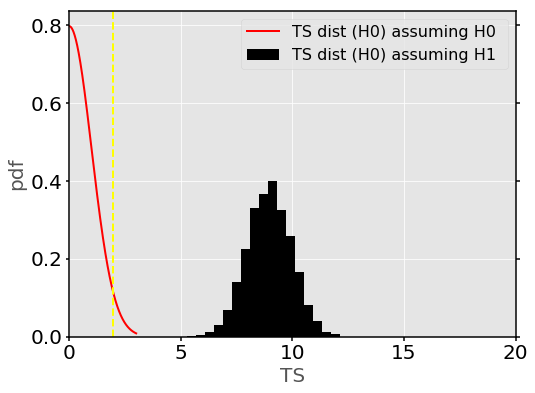

H1: mu = 18.333333333333336


<Figure size 432x288 with 0 Axes>

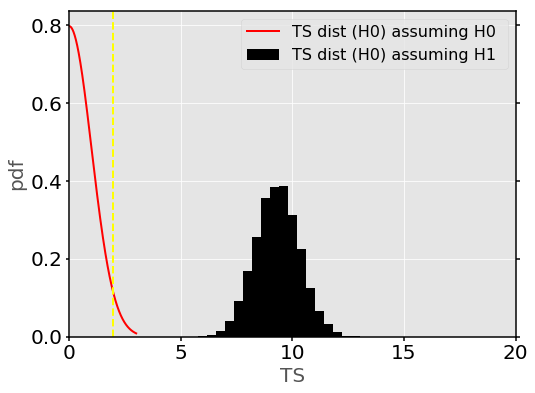

H1: mu = 18.636363636363637


<Figure size 432x288 with 0 Axes>

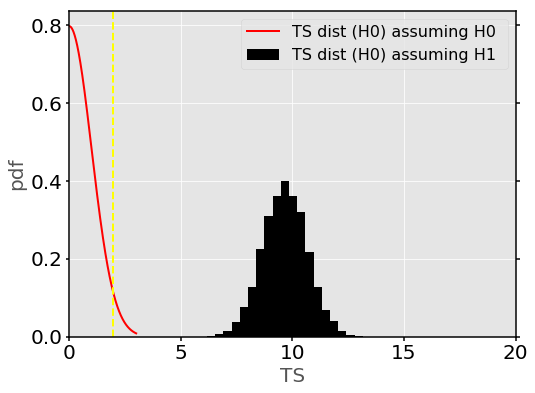

H1: mu = 18.93939393939394


<Figure size 432x288 with 0 Axes>

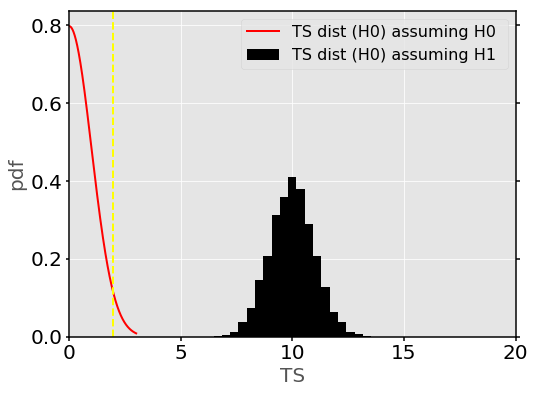

H1: mu = 19.242424242424242


<Figure size 432x288 with 0 Axes>

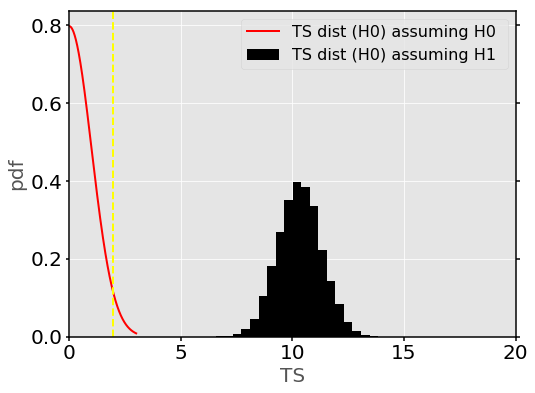

H1: mu = 19.545454545454547


<Figure size 432x288 with 0 Axes>

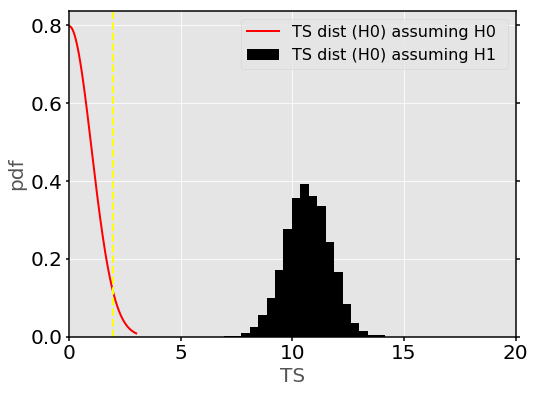

H1: mu = 19.848484848484848


<Figure size 432x288 with 0 Axes>

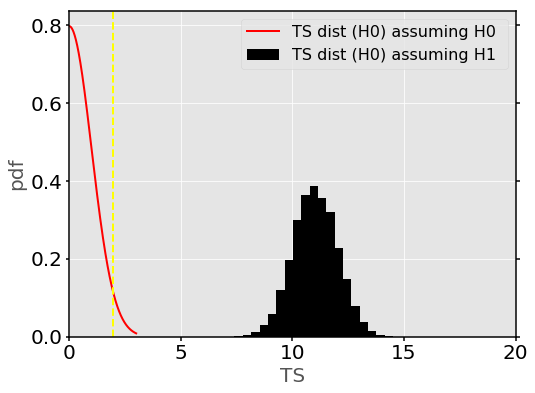

H1: mu = 20.151515151515152


<Figure size 432x288 with 0 Axes>

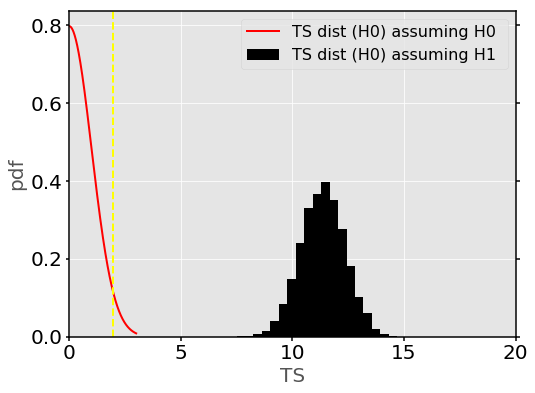

H1: mu = 20.454545454545457


<Figure size 432x288 with 0 Axes>

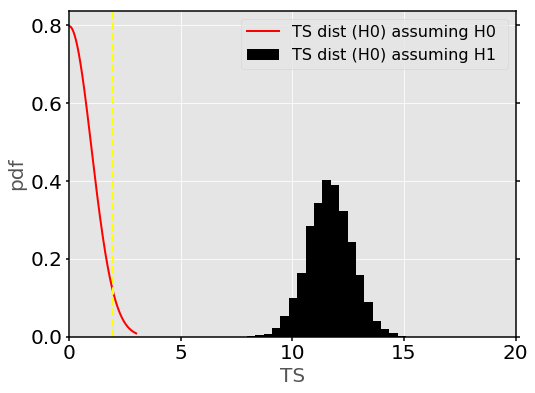

H1: mu = 20.757575757575758


<Figure size 432x288 with 0 Axes>

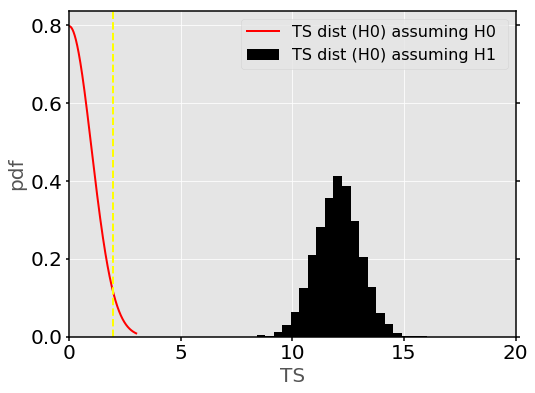

H1: mu = 21.060606060606062


<Figure size 432x288 with 0 Axes>

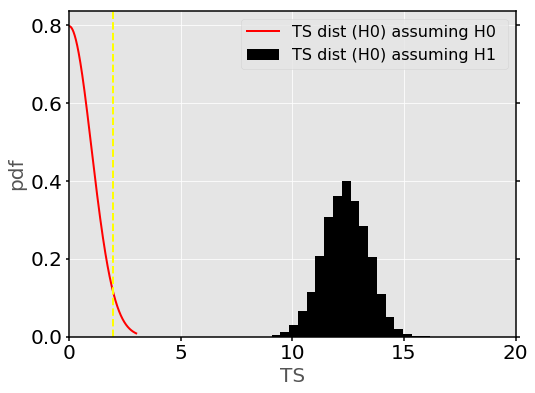

H1: mu = 21.363636363636363


<Figure size 432x288 with 0 Axes>

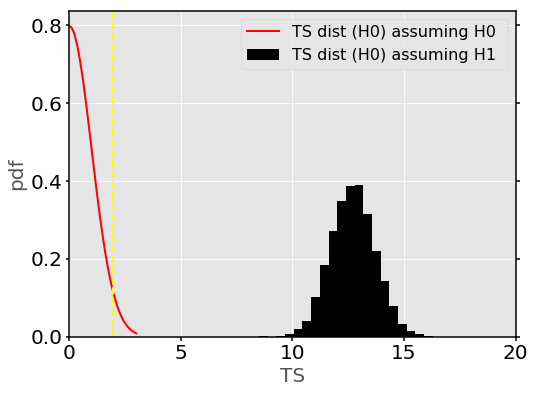

H1: mu = 21.666666666666668


<Figure size 432x288 with 0 Axes>

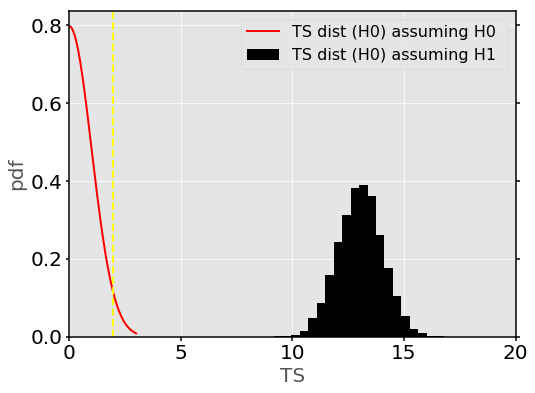

H1: mu = 21.96969696969697


<Figure size 432x288 with 0 Axes>

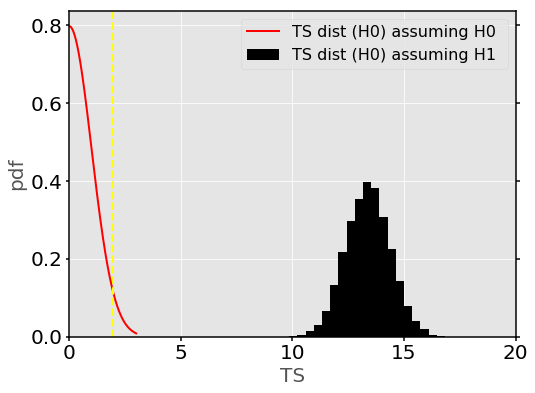

H1: mu = 22.272727272727273


<Figure size 432x288 with 0 Axes>

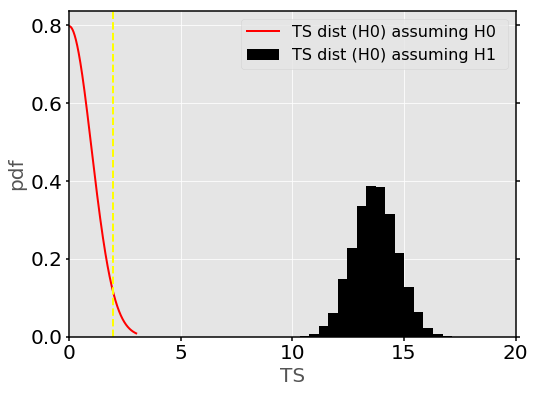

H1: mu = 22.575757575757578


<Figure size 432x288 with 0 Axes>

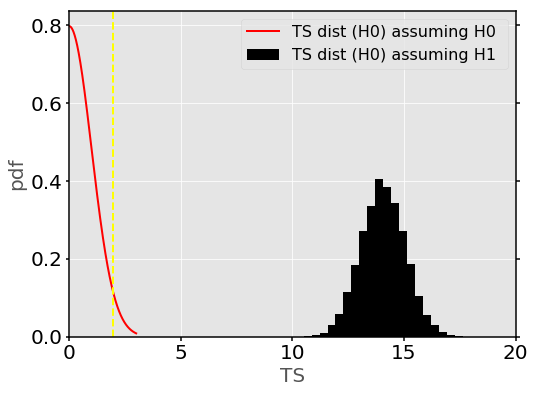

H1: mu = 22.87878787878788


<Figure size 432x288 with 0 Axes>

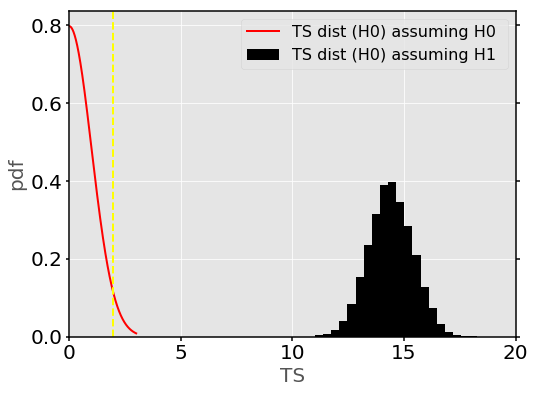

H1: mu = 23.181818181818183


<Figure size 432x288 with 0 Axes>

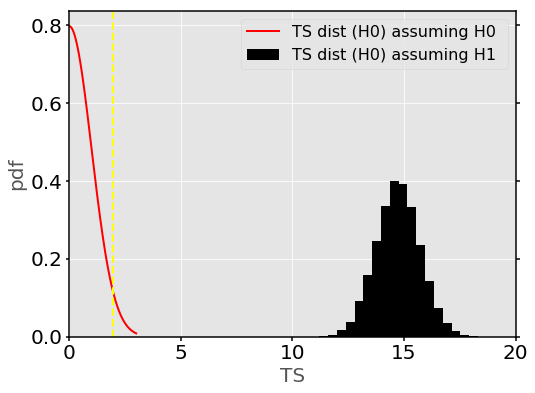

H1: mu = 23.484848484848484


<Figure size 432x288 with 0 Axes>

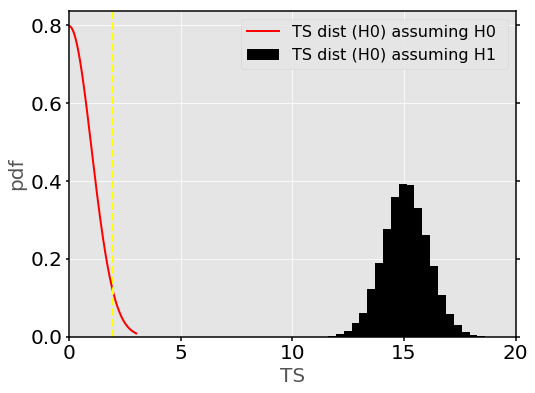

H1: mu = 23.78787878787879


<Figure size 432x288 with 0 Axes>

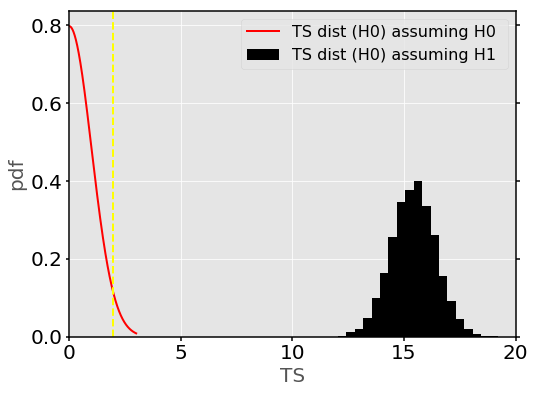

H1: mu = 24.090909090909093


<Figure size 432x288 with 0 Axes>

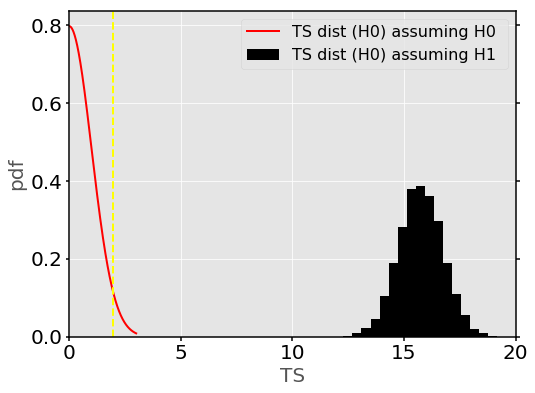

H1: mu = 24.393939393939394


<Figure size 432x288 with 0 Axes>

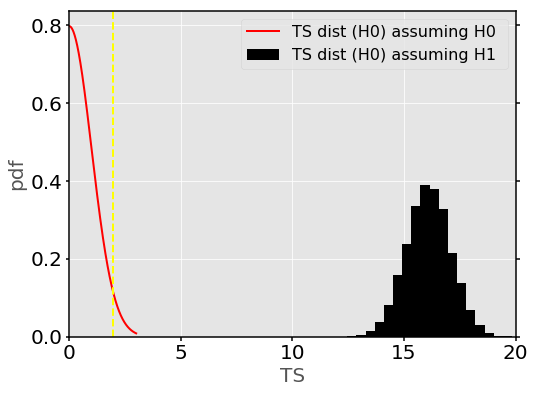

H1: mu = 24.6969696969697


<Figure size 432x288 with 0 Axes>

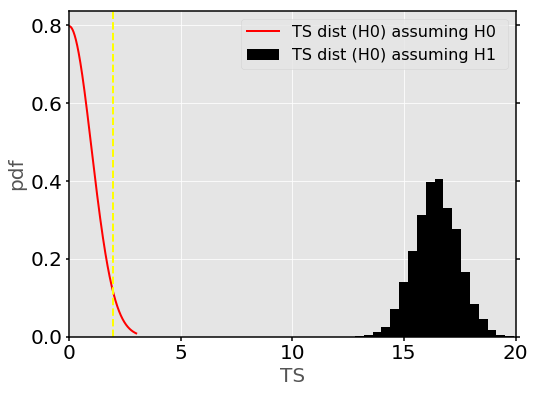

H1: mu = 25.0


<Figure size 432x288 with 0 Axes>

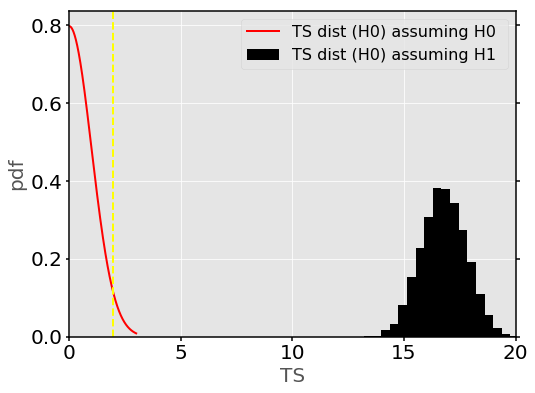

<Figure size 432x288 with 0 Axes>

In [10]:
# Let's compare to simulation
xvals = np.linspace(0,3, 1000)
yvals = norm.pdf(xvals, 0, 1)* 2
powers_sim = []
for mu in possible_mus:
    # generate nsamples trials
    ndatasets = 10000
    rejected = []
    tts = []
    for i in range(ndatasets):
        X = np.random.normal(mu, sigma, tn)
        TS = normal_TS(X, mu0, tsigma=sigma, n=tn)
        tts.append(TS)
        if TS > c0:
            rejected.append(1)
        else:
            rejected.append(0)
      
    print "H1: mu =", mu
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    plt.hist(tts, density=True, color='k', bins=20, label="TS dist (H0) assuming H1 ")
    plt.plot(xvals,yvals, 'r-', linewidth=2, label="TS dist (H0) assuming H0")
    plt.xlim([0, 20.0])
    ax.set_xlabel('TS', fontsize=20)
    ax.set_ylabel('pdf', fontsize=20)
    for axis in ['top','bottom','left','right']:
              ax.spines[axis].set_linewidth(1.5)
              ax.spines[axis].set_color('0.0')
        
    ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=20)
    ax.yaxis.set_ticks_position('both')
    ax.axvline(x=c0, color='yellow', linewidth=2, linestyle='dashed')
    plt.legend(fontsize=16) 
    plt.show()
    plt.clf()

    rejected = np.asarray(rejected)
    idx = np.where(rejected>0.5)[0]
    powers_sim.append(len(rejected[idx])*1.0/len(rejected))

(5.0, 15.0)

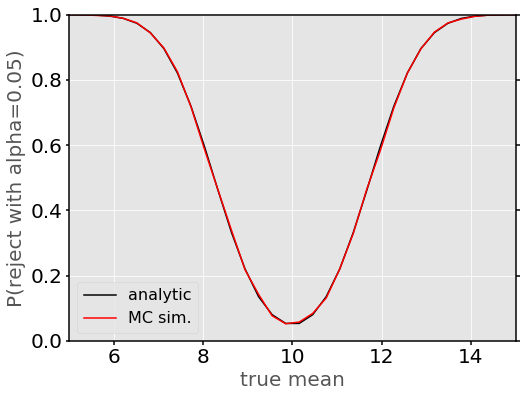

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
plt.plot(possible_mus, powers, "k-", label='analytic')
plt.plot(possible_mus, powers_sim, "r-", label='MC sim.')
plt.ylim([0, 1.0])
ax.set_xlabel('true mean', fontsize=20)
ax.set_ylabel('P(reject with alpha=0.05)', fontsize=20)
for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(1.5)
          ax.spines[axis].set_color('0.0')
    
ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=20)
ax.yaxis.set_ticks_position('both')
plt.legend(fontsize=16)
plt.xlim([5.0, 15.0])

In [12]:
print np.amin(powers_sim)

0.0524


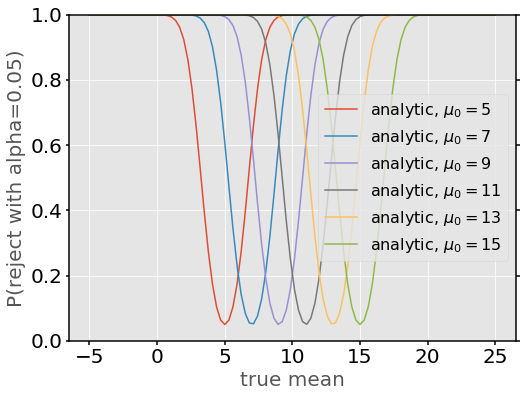

In [13]:
powers_mu0 = []
for mu0 in some_mus:
    possible_mus = np.linspace(-5,25,100)
    powers = [norm.cdf(-c0+(mu0-mu)/(sigma/np.sqrt(tn)),0,1)+(1.-norm.cdf(c0+(mu0-mu)/(sigma/np.sqrt(tn)),0,1)) for mu in possible_mus]
    powers_mu0.append(powers)

    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
for obj in zip(some_mus, powers_mu0):
    tmu0, powers = obj
    plt.plot(possible_mus, powers, label='analytic, $\mu_0=%d$' %(tmu0))
    
plt.ylim([0, 1.0])
ax.set_xlabel('true mean', fontsize=20)
ax.set_ylabel('P(reject with alpha=0.05)', fontsize=20)
for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(1.5)
          ax.spines[axis].set_color('0.0')
    
ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=20)
ax.yaxis.set_ticks_position('both')
plt.legend(fontsize=16)

# power is independent of true value that defines H0 in this problem
# this is nice!